# Load the CSV File

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import ast  # For safely evaluating strings of lists
import seaborn as sns
%matplotlib inline

df_10 = pd.read_excel('../results_qualitative_10_t00_gpt4-1-mini.xlsx')
df_100 = pd.read_excel('../results_qualitative_100_t00_gpt4-1-mini.xlsx')
df_650 = pd.read_excel('../results_qualitative_650_t00_gpt4-1-mini.xlsx')


In [6]:
df_raw_pois = pd.read_csv('../../data/csv/generated_GPT4o_Madrid_v3.csv', sep=',', quotechar='"')
df_raw_pois

,id,type,title,relevance,image,location_type,coordinates,price,description,capacity,occupancy
0,urn:ngsi-ld:PoI:0,PoI,Pastelería Celia,4,NaN,Point,"-3.708912,40.419877",0€,"Pastelería en el barrio de Chueca, conocida po...",66,30
1,urn:ngsi-ld:PoI:1,PoI,Dama de Baza,3,NaN,Point,"-3.695370,40.410897",0€,Escultura íbera ubicada en el Museo Arqueológi...,1171,1068
2,urn:ngsi-ld:PoI:2,PoI,Avenida de Andalucía,5,NaN,Point,"-3.692827,40.417684",0€,Vía importante que conecta con diferentes zona...,1968,506
3,urn:ngsi-ld:PoI:3,PoI,Restaurante La Oveja Negra,3,NaN,Point,"-3.711142,40.418345",0€,"Restaurante en el barrio de Chamartín, conocid...",578,399
4,urn:ngsi-ld:PoI:4,PoI,Hospital Santa Cristina,3,NaN,Point,"-3.706879,40.426560",0€,"Hospital de mediana complejidad, conocido por ...",1679,1212
...,...,...,...,...,...,...,...,...,...,...,...
1083,urn:ngsi-ld:PoI:1083,PoI,Puente de Segovia,4,NaN,Point,"-3.721735,40.415774",0€,El Puente de Segovia es el puente más antiguo ...,200,109
1084,urn:ngsi-ld:PoI:1084,PoI,Gran Salón de Madrid,4,NaN,Point,"-3.704119,40.419431",0€,Espacio para eventos y exposiciones en el cent...,1563,1267
1085,urn:ngsi-ld:PoI:1085,PoI,Teatro Cofidis Alcázar,3,NaN,Point,"-3.704260,40.420580",0€,"Teatro en el barrio de Chueca, conocido por su...",578,26
1086,urn:ngsi-ld:PoI:1086,PoI,Juguetería Juguetes y Juegos,4,NaN,Point,"-3.702103,40.419334",0€,Tienda que ofrece una gran variedad de juguete...,562,514


In [7]:
## Helper function to print the whole dataset
## source: https://stackoverflow.com/questions/25351968/how-can-i-display-full-non-truncated-dataframe-information-in-html-when-conver

def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

### Transform the price to a number and percentage of occupancy. 

If price is a range, get the average

In [8]:
# Define a function to transform price values
def transform_price(price):
    if '€' in price:
        price = price.replace('€', '')  # Remove the '€' symbol
    if '-' in price:  # If it's a range like '20-40', calculate the average
        low, high = price.split('-')
        return int((float(low) + float(high)) / 2)
    elif price.replace(',', '').isdigit():  # Handle values like '4'
        return int(float(price.replace(',', '.')))
    else:  # For non-numeric values like 'varios precios'
        return -1  
    
    
df_raw_pois['price_avg'] = df_raw_pois['price'].apply(transform_price)
df_raw_pois['percentage_occupancy'] = df_raw_pois['occupancy']/df_raw_pois['capacity']*100.0

### Extract the entities IDs of the 10, 100 and 650 limits
And also create a dataframe out of it

In [9]:
list_entities_query_10  = ast.literal_eval(df_10[df_10['limit'] ==10]['zoomedEntities'].reset_index().iloc[0]['zoomedEntities'])
list_entities_query_100 = ast.literal_eval(df_100[df_100['limit']==100]['zoomedEntities'].reset_index().iloc[0]['zoomedEntities'])
list_entities_query_650 = ast.literal_eval(df_650[df_650['limit']==650]['zoomedEntities'].reset_index().iloc[0]['zoomedEntities'])
list_entities_query_10

['urn:ngsi-ld:PoI:170',
 'urn:ngsi-ld:PoI:213',
 'urn:ngsi-ld:PoI:23',
 'urn:ngsi-ld:PoI:230',
 'urn:ngsi-ld:PoI:240',
 'urn:ngsi-ld:PoI:246',
 'urn:ngsi-ld:PoI:258',
 'urn:ngsi-ld:PoI:287',
 'urn:ngsi-ld:PoI:381',
 'urn:ngsi-ld:PoI:422']

In [10]:
import json

# Lista de IDs que quieres filtrar

# Leer el JSON original
with open("../../data/generated_GPT4o_Madrid.json", "r", encoding="utf-8") as f:
    datos = json.load(f)

filter_10 = [item for item in datos if item.get("id") in list_entities_query_10]
filter_100 = [item for item in datos if item.get("id") in list_entities_query_100]
filter_650 = [item for item in datos if item.get("id") in list_entities_query_650]

# Guardar el resultado en un nuevo JSON
with open("../../data/generated_GPT4o_Madrid_10.json", "w", encoding="utf-8") as f_out:
    json.dump(filter_10, f_out, ensure_ascii=False, indent=4)

with open("../../data/generated_GPT4o_Madrid_100.json", "w", encoding="utf-8") as f_out:
    json.dump(filter_100, f_out, ensure_ascii=False, indent=4)

with open("../../data/generated_GPT4o_Madrid_650.json", "w", encoding="utf-8") as f_out:
    json.dump(filter_650, f_out, ensure_ascii=False, indent=4)





In [11]:
df_entities_limit_10 = df_raw_pois[df_raw_pois["id"].isin(list_entities_query_10)]
df_entities_limit_100= df_raw_pois[df_raw_pois["id"].isin(list_entities_query_100)]
df_entities_limit_650= df_raw_pois[df_raw_pois["id"].isin(list_entities_query_650)]

## Show the entities in the 10-limit filter

In [12]:
print_full(df_entities_limit_10[["title", "relevance", "price", "capacity","occupancy", "price_avg"]])

                                             title  relevance   price  capacity  occupancy  price_avg
23                     Hospital Clínico San Carlos          1      0€      1679       1067          0
170                           Restaurante StreetXO          1  60-80€       578        523         70
213  Iglesia de Santa María la Real de La Almudena          1      0€       741        707          0
230                  Juzgados de Plaza de Castilla          1      0€      1563       1437          0
240                      Retaurante El Club Allard          1      0€       702        585          0
246                   Restaurante Sobrino de Botín          1      0€       702        391          0
258           Hospital Universitario 12 de Octubre          1      0€      1679        393          0
287        Universidad Politécnica de Madrid (UPM)          1      0€      1760        398          0
381                              Restaurante Botín          1     18€       702   

In [13]:
df_entities_limit_10['price'].unique()

array(['0€', '60-80€', '18€'], dtype=object)

<Axes: >

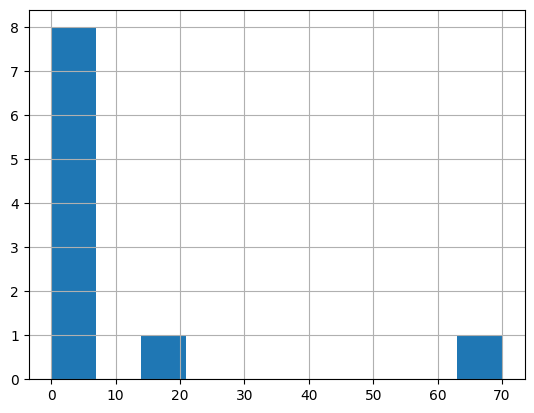

In [14]:
df_entities_limit_10['price_avg'].hist()

## Show the entities in the 100-limit filter

In [15]:
print_full(df_entities_limit_100.sort_values(by="relevance")[["title", "relevance", "price", "occupancy", "price_avg"]])

                                                             title  relevance           price  occupancy  price_avg
5                                                  Museo del Prado          1             15€        870         15
23                                     Hospital Clínico San Carlos          1              0€       1067          0
92                                                  Puerta del Sol          1              0€      29708          0
43                                                 Churrería Valor          1              0€         35          0
170                                           Restaurante StreetXO          1          60-80€        523         70
240                                      Retaurante El Club Allard          1              0€        585          0
246                                   Restaurante Sobrino de Botín          1              0€        391          0
213                  Iglesia de Santa María la Real de La Almudena      

In [16]:
df_entities_limit_100['price'].unique()

array(['15€', '0€', '60-80€', '25€', '18€', '2€', '10€', '13€', '4€',
       '12€', 'varios precios'], dtype=object)

<Axes: >

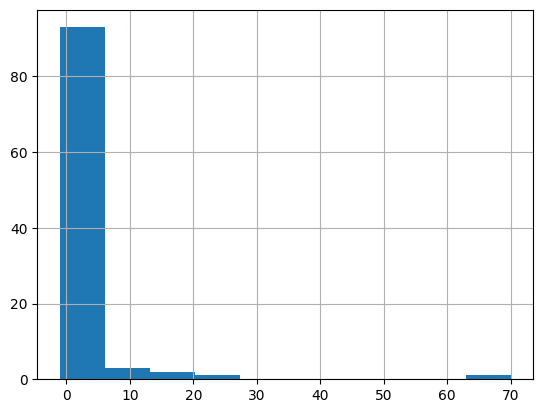

In [17]:
df_entities_limit_100['price_avg'].hist()

## Show the entities in the 650-limit filter

In [18]:
print_full(df_entities_limit_650.sort_values(by="relevance")[["title", "relevance", "price", "occupancy", "price_avg" ]])

                                                             title  relevance           price  occupancy  price_avg
23                                     Hospital Clínico San Carlos          1              0€       1067          0
994                             Iglesia de San Francisco el Grande          1              0€         76          0
870                                                         Atocha          1  varios precios       1562         -1
43                                                 Churrería Valor          1              0€         35          0
759                                     Centro de Arte Reina Sofía          1              0€        433          0
92                                                  Puerta del Sol          1              0€      29708          0
812                                         Palacio Real de Madrid          1             12€       1449         12
805                        Hospital Universitario Gregorio Marañón      

In [19]:
df_entities_limit_650['price'].unique()

array(['0€', '15€', '3€', '8€', '20-40€', '7€', '30-55€', '6€', '5€',
       '25-50€', '25-55€', '60-80€', '25€', '25-45€', '3,60€', '2€',
       '30-50€', '18€', '10€', '13€', '4€', '20-45€', '20-50€', '12€',
       'varios precios'], dtype=object)

<Axes: >

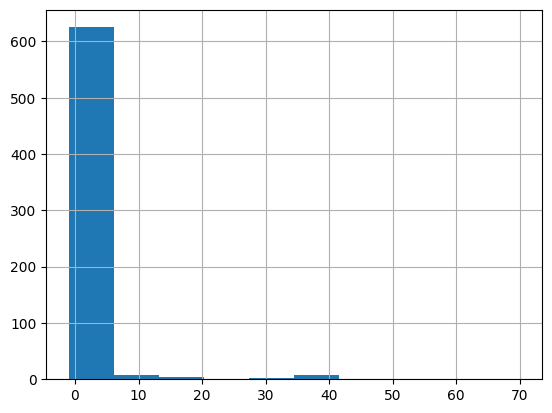

In [20]:
df_entities_limit_650['price_avg'].hist()

In [21]:
#Q1: Could you please recommend the most interesting landmarks or places in Madrid to me? -> check that the entities recommended are the only ones from the list
df_entities_limit_10['title']
# df_entities_limit_100['title']
# df_entities_limit_650['title']

23                       Hospital Clínico San Carlos
170                             Restaurante StreetXO
213    Iglesia de Santa María la Real de La Almudena
230                    Juzgados de Plaza de Castilla
240                        Retaurante El Club Allard
246                     Restaurante Sobrino de Botín
258             Hospital Universitario 12 de Octubre
287          Universidad Politécnica de Madrid (UPM)
381                                Restaurante Botín
422                                        El Retiro
Name: title, dtype: object

In [22]:
#Q2: Please, show me a list of the top 5 most relevant sites in Madrid -> all of relevance 1 in three cases
df_entities_limit_10.sort_values(by="relevance", ascending=True)[["title", "relevance"]].head(10)
df_entities_limit_100.sort_values(by="relevance", ascending=True)[["title", "relevance"]].head(10)
df_entities_limit_650.sort_values(by="relevance", ascending=True)[["title", "relevance"]].head(10)


a10 = df_entities_limit_10[df_entities_limit_10["relevance"]==1][["title", "relevance"]]
print(len(a10))
a100 = df_entities_limit_100[df_entities_limit_100["relevance"]==1][["title", "relevance"]]
print(len(a100))
a650 = df_entities_limit_650[df_entities_limit_650["relevance"]==1][["title", "relevance"]]
print(len(a650))

10
29
29


In [23]:
#Q3 Please, inform me of all the places I can visit in Madrid today that have a cost between 10€ and 20€
a10 = df_entities_limit_10[(df_entities_limit_10['price_avg'] <= 20) & (df_entities_limit_10['price_avg'] >= 10)]
print(len(a10))
a10

a100 = df_entities_limit_100[(df_entities_limit_100['price_avg'] <= 20) & (df_entities_limit_100['price_avg'] >= 10)]
print(len(a100))
a100

a650 = df_entities_limit_650[(df_entities_limit_650['price_avg'] <= 20) & (df_entities_limit_650['price_avg'] >= 10)]
print(len(a650))
a650

a650

1
5
7


,id,type,title,relevance,image,location_type,coordinates,price,description,capacity,occupancy,price_avg,percentage_occupancy
5,urn:ngsi-ld:PoI:5,PoI,Museo del Prado,1,mdprado.jpeg,Point,"-3.692127,40.41378",15€,El Museo del Prado es el museo más importante ...,1171,870,15,74.295474
253,urn:ngsi-ld:PoI:253,PoI,Acuario de Madrid,4,NaN,Point,"-3.693553,40.407249",15€,Un lugar fascinante para descubrir la vida mar...,1563,1021,15,65.323097
381,urn:ngsi-ld:PoI:381,PoI,Restaurante Botín,1,NaN,Point,"-3.708292,40.415366",18€,Uno de los restaurantes más antiguos del mundo...,702,507,18,72.222222
386,urn:ngsi-ld:PoI:386,PoI,Museo de Cera de Madrid,4,NaN,Point,"-3.689311,40.423706",18€,El Museo de Cera de Madrid presenta figuras de...,1171,421,18,35.952178
458,urn:ngsi-ld:PoI:458,PoI,Museo Reina Sofía,1,museo_reina_sofia.jpg,Point,"-3.694159,40.408665",10€,El Museo Reina Sofía es el principal museo de ...,1171,187,10,15.969257
500,urn:ngsi-ld:PoI:500,PoI,Museo Thyssen-Bornemisza,1,Museo_Thyssen-Bornemisza.jpeg,Point,"-3.69425,40.416873",13€,El Museo Thyssen-Bornemisza alberga una de las...,1171,517,13,44.150299
812,urn:ngsi-ld:PoI:812,PoI,Palacio Real de Madrid,1,palacioreal.jpeg,Point,"-3.714312,40.41798",12€,"El Palacio Real de Madrid, también conocido co...",1693,1449,12,85.587714


In [24]:
#Q4 Please, show me some landmarks that are free of charge

a10 = df_entities_limit_10[df_entities_limit_10['price_avg'] == 0]
print(len(a10))
a10

a100 = df_entities_limit_100[df_entities_limit_100['price_avg'] == 0]
print(len(a100))
a100

a650 = df_entities_limit_650[df_entities_limit_650['price_avg'] == 0]
print(len(a650))
a650

8
90
599


,id,type,title,relevance,image,location_type,coordinates,price,description,capacity,occupancy,price_avg,percentage_occupancy
0,urn:ngsi-ld:PoI:0,PoI,Pastelería Celia,4,NaN,Point,"-3.708912,40.419877",0€,"Pastelería en el barrio de Chueca, conocida po...",66,30,0,45.454545
1,urn:ngsi-ld:PoI:1,PoI,Dama de Baza,3,NaN,Point,"-3.695370,40.410897",0€,Escultura íbera ubicada en el Museo Arqueológi...,1171,1068,0,91.204099
3,urn:ngsi-ld:PoI:3,PoI,Restaurante La Oveja Negra,3,NaN,Point,"-3.711142,40.418345",0€,"Restaurante en el barrio de Chamartín, conocid...",578,399,0,69.031142
4,urn:ngsi-ld:PoI:4,PoI,Hospital Santa Cristina,3,NaN,Point,"-3.706879,40.426560",0€,"Hospital de mediana complejidad, conocido por ...",1679,1212,0,72.185825
10,urn:ngsi-ld:PoI:10,PoI,Madrilana,4,NaN,Point,"-3.711523,40.418901",0€,"Tienda de productos típicos madrileños, incluy...",66,33,0,50.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,urn:ngsi-ld:PoI:1083,PoI,Puente de Segovia,4,NaN,Point,"-3.721735,40.415774",0€,El Puente de Segovia es el puente más antiguo ...,200,109,0,54.500000
1084,urn:ngsi-ld:PoI:1084,PoI,Gran Salón de Madrid,4,NaN,Point,"-3.704119,40.419431",0€,Espacio para eventos y exposiciones en el cent...,1563,1267,0,81.062060
1085,urn:ngsi-ld:PoI:1085,PoI,Teatro Cofidis Alcázar,3,NaN,Point,"-3.704260,40.420580",0€,"Teatro en el barrio de Chueca, conocido por su...",578,26,0,4.498270
1086,urn:ngsi-ld:PoI:1086,PoI,Juguetería Juguetes y Juegos,4,NaN,Point,"-3.702103,40.419334",0€,Tienda que ofrece una gran variedad de juguete...,562,514,0,91.459075


In [25]:
#Q5 Please, list some places that are related to sports -> manual review
# 10 -> no 100 and 650 -> yes

'''
100 -> Santiago Bernabéu
Estadio Santiago Bernabéu

650 -> Santiago Bernabéu
Estadio Vicente Calderón
Centro Deportivo Municipal La Vaguada
Gimnasio de Alta Intensidad
Gimnasio al Aire Libre
Hipódromo de la Zarzuela
Estadio Santiago Bernabéu
'''

'\n100 -> Santiago Bernabéu\nEstadio Santiago Bernabéu\n\n650 -> Santiago Bernabéu\nEstadio Vicente Calderón\nCentro Deportivo Municipal La Vaguada\nGimnasio de Alta Intensidad\nGimnasio al Aire Libre\nHipódromo de la Zarzuela\nEstadio Santiago Bernabéu\n'

In [26]:
#Q6 Do you know the Museo del Prado -> manual review
# 10 -> no 100 and 650 -> yes

In [27]:
# Q7 Could you please let me know if the Museo del Prado is free of charge to enter?
# 10 -> cant know 100 and 650 -> is not free

In [28]:
# Q8 Please tell me if the Museo del Prado is currently crowded?
# 10 -> cant know 100 and 650 -> a bit busy

In [29]:
# Q9 Could you please show me places with an occupancy of less than 50 people and a relevance of 1?

a10 = df_entities_limit_10[(df_entities_limit_10['occupancy'] < 50) & (df_entities_limit_10['relevance'] == 1)]
print(len(a10))
a10

a100 = df_entities_limit_100[(df_entities_limit_100['occupancy'] < 50) & (df_entities_limit_100['relevance'] == 1)]
print(len(a100))
a100

a650 = df_entities_limit_650[(df_entities_limit_650['occupancy'] < 50) & (df_entities_limit_650['relevance'] == 1)]
print(len(a650))
a650


0
3
3


,id,type,title,relevance,image,location_type,coordinates,price,description,capacity,occupancy,price_avg,percentage_occupancy
43,urn:ngsi-ld:PoI:43,PoI,Churrería Valor,1,NaN,Point,"-3.709691,40.419735",0€,"Famosa churrería en el barrio de Chueca, conoc...",36,35,0,97.222222
553,urn:ngsi-ld:PoI:553,PoI,Churrería San Ginés,1,NaN,Point,"-3.711065,40.416615",0€,"Icónica churrería en el centro de Madrid, famo...",36,24,0,66.666667
768,urn:ngsi-ld:PoI:768,PoI,Plaza Mayor,1,Plaza_Mayor_de_Madrid_06.jpg,Point,"-3.707398,40.415364",0€,La Plaza Mayor es una de las plazas más conoci...,444,9,0,2.027027


In [30]:
# Q10 Could you please show me places that have an occupancy of not less than 50 people and a relevance that is not 1?
a10 = df_entities_limit_10[(df_entities_limit_10['occupancy'] >= 50) & (df_entities_limit_10['relevance'] != 1)]
print(len(a10))
a10

a100 = df_entities_limit_100[(df_entities_limit_100['occupancy'] >= 50) & (df_entities_limit_100['relevance'] != 1)]
print(len(a100))
a100

a650 = df_entities_limit_650[(df_entities_limit_650['occupancy'] >= 50) & (df_entities_limit_650['relevance'] != 1)]
print(len(a650))
a650

pd.set_option('display.max_rows', 20)
#a100['title'].to_csv("ex.csv", sep=',', index=False, header=True)    


0
64
546


In [31]:
# Q11 Could you please show me places with an occupancy of less than 50 people or a relevance of 1?

a10 = df_entities_limit_10[(df_entities_limit_10['occupancy'] < 50) | (df_entities_limit_10['relevance'] == 1)]
print(len(a10))
a10

a100 = df_entities_limit_100[(df_entities_limit_100['occupancy'] < 50) | (df_entities_limit_100['relevance'] == 1)]
print(len(a100))
a100

a650 = df_entities_limit_650[(df_entities_limit_650['occupancy'] < 50) | (df_entities_limit_650['relevance'] == 1)]
print(len(a650))
a650

a100

10
36
104


,id,type,title,relevance,image,location_type,coordinates,price,description,capacity,occupancy,price_avg,percentage_occupancy
5,urn:ngsi-ld:PoI:5,PoI,Museo del Prado,1,mdprado.jpeg,Point,"-3.692127,40.41378",15€,El Museo del Prado es el museo más importante ...,1171,870,15,7.429547e+01
23,urn:ngsi-ld:PoI:23,PoI,Hospital Clínico San Carlos,1,NaN,Point,"-3.724746,40.429737",0€,"Uno de los principales hospitales de Madrid, c...",1679,1067,0,6.354973e+01
43,urn:ngsi-ld:PoI:43,PoI,Churrería Valor,1,NaN,Point,"-3.709691,40.419735",0€,"Famosa churrería en el barrio de Chueca, conoc...",36,35,0,9.722222e+01
52,urn:ngsi-ld:PoI:52,PoI,Hotel Eurostars Madrid Tower,2,NaN,Point,"-3.708204,40.464858",0€,"Hotel de lujo en la Torre Espacio, con vistas ...",1166,31,0,2.658662e+00
92,urn:ngsi-ld:PoI:92,PoI,Puerta del Sol,1,sol.jpg,Point,"-3.703834,40.416947",0€,La Puerta del Sol es una de las plazas más fam...,99999999999999999,29708,0,2.970800e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,urn:ngsi-ld:PoI:768,PoI,Plaza Mayor,1,Plaza_Mayor_de_Madrid_06.jpg,Point,"-3.707398,40.415364",0€,La Plaza Mayor es una de las plazas más conoci...,444,9,0,2.027027e+00
805,urn:ngsi-ld:PoI:805,PoI,Hospital Universitario Gregorio Marañón,1,NaN,Point,"-3.701175,40.418917",0€,Hospital de referencia en Madrid para diversas...,1679,1592,0,9.481834e+01
812,urn:ngsi-ld:PoI:812,PoI,Palacio Real de Madrid,1,palacioreal.jpeg,Point,"-3.714312,40.41798",12€,"El Palacio Real de Madrid, también conocido co...",1693,1449,12,8.558771e+01
870,urn:ngsi-ld:PoI:870,PoI,Atocha,1,NaN,Point,"-3.691940,40.407223",varios precios,"La principal estación de tren de Madrid, con c...",1723,1562,-1,9.065583e+01


In [32]:
# Q12 Could you please show me places that are occupied by not fewer than 50 people or have a relevance not equal to 1?
a10 = df_entities_limit_10[(df_entities_limit_10['occupancy'] >= 50) | (df_entities_limit_10['relevance'] != 1)]
print(len(a10))
a10

a100 = df_entities_limit_100[(df_entities_limit_100['occupancy'] >= 50) | (df_entities_limit_100['relevance'] != 1)]
print(len(a100))
a100

a650 = df_entities_limit_650[(df_entities_limit_650['occupancy'] >= 50) | (df_entities_limit_650['relevance'] != 1)]
print(len(a650))
a650

notA100 = df_entities_limit_100[(df_entities_limit_100['occupancy'] < 50) & (df_entities_limit_100['relevance'] == 1)]
notA100

notA650 = df_entities_limit_650[(df_entities_limit_650['occupancy'] < 50) & (df_entities_limit_650['relevance'] == 1)]
notA650





10
97
647


,id,type,title,relevance,image,location_type,coordinates,price,description,capacity,occupancy,price_avg,percentage_occupancy
43,urn:ngsi-ld:PoI:43,PoI,Churrería Valor,1,NaN,Point,"-3.709691,40.419735",0€,"Famosa churrería en el barrio de Chueca, conoc...",36,35,0,97.222222
553,urn:ngsi-ld:PoI:553,PoI,Churrería San Ginés,1,NaN,Point,"-3.711065,40.416615",0€,"Icónica churrería en el centro de Madrid, famo...",36,24,0,66.666667
768,urn:ngsi-ld:PoI:768,PoI,Plaza Mayor,1,Plaza_Mayor_de_Madrid_06.jpg,Point,"-3.707398,40.415364",0€,La Plaza Mayor es una de las plazas más conoci...,444,9,0,2.027027
